# SUBMITTED BY : <font color = blue> RAJESH SUGURU </font>

# Ref : https://learn.upgrad.com/v/course/498/session/60020/segment/333729

# Problem Statement

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of car prices. You will need to submit a Jupyter notebook for the same. 

 

# Detailed Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

# Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 



# Solution Approach

### Ref : https://learn.upgrad.com/v/course/498/session/60016/segment/333685
### Ref : https://learn.upgrad.com/v/course/498/session/60018/segment/333704

### 1) Read, understand and visualise the data with the help of **Numpy, Pandas, Seaborn and Matplotlib**
### 2) Data Preparation 
>> Split the data into training data and test data set
(**from sklearn.model_selection import train_test_split)**, 
                                                       scaling (**from sklearn.preprocessing import MinMaxScaler**)
### 3) Train the model(**import statsmodels.api as sm**)
### 4) Perform Residual Analysis (**from statsmodels.stats.outliers_influence import variance_inflation_factor**)
### 5) Predictions and evaluations on the test set with help of R Sqaure  ( from sklearn.metrics import r2_score <br/> 
# Achieve Best Fit Model to predict the Car Prices



# <font color = blue> Data understanding, EDA and preparation Starts Here </font>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore') ##Ignore the warnings

In [3]:
carsprice_df = pd.read_csv("CarPrice_Assignment.csv")
carsprice_df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
## car_ID is not going to add any value for my analysis, hence decided to Drop

carsprice_df.drop(columns=['car_ID'], inplace=True)


In [5]:
carsprice_df.shape 

(205, 25)

#### Derive the value adding predictors from 24 colums 
#### Required to draw meaningful insights of the Price from the identified predictors by using tain and test datasets .  

In [6]:
carsprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

### There are (8 float64 and 7 int64) columns. In total 

>> 15 numerical columns and <br/>
>> 10 categorical columns

In [7]:
carsprice_df.isnull().sum()


symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Good Dataset. No null values in any of the column

In [8]:
carsprice_df.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

#### At high level understanding of Car Pricing Distribution

>> Minimum price of the car is **5118** <br/>
>> Price in First quartile is **7788** <br/>
>> Median price is **10295** <br/>
>> Price in Third quartine(75%) is **16503** <br/>
>> Max Price of the Car is **45400** <br/>

### Split CarName column to get car Commpany Name and eliminate Car Model

In [9]:
carsprice_df.head(10)

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   
5          2                  audi fox      gas        std        two   
6          1                audi 100ls      gas        std       four   
7          1                 audi 5000      gas        std       four   
8          1                 audi 4000      gas      turbo       four   
9          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  carlength    ...      \
0  convertible        rwd          front       88.6      168.8    ...       
1  convertible        rwd          front       88.6      168.8    ...       
2    hatchback        rwd          front       94.5      171.2    ...       
3        sedan        fwd          front       99.8      176.6    ...       
4        sedan        4wd          front       99.4      176.6    ...       
5        sedan        fwd          front       99.8      177.3    ...       
6        sedan        fwd          front      105.8      192.7    ...       
7        wagon        fwd          front      105.8      192.7    ...       
8        sedan        fwd          front      105.8      192.7    ...       
9    hatchback        4wd          front       99.5      178.2    ...       

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   
5         136        mpfi       3.19   3.40              8.5         110   
6         136        mpfi       3.19   3.40              8.5         110   
7         136        mpfi       3.19   3.40              8.5         110   
8         131        mpfi       3.13   3.40              8.3         140   
9         131        mpfi       3.13   3.40              7.0         160   

  peakrpm  citympg  highwaympg      price  
0    5000       21          27  13495.000  
1    5000       21          27  16500.000  
2    5000       19          26  16500.000  
3    5500       24          30  13950.000  
4    5500       18          22  17450.000  
5    5500       19          25  15250.000  
6    5500       19          25  17710.000  
7    5500       19          25  18920.000  
8    5500       17          20  23875.000  
9    5500       16          22  17859.167  

[10 rows x 25 columns]

In [10]:
carsprice_df['CarName'] = carsprice_df['CarName'].str.upper().str.split(" ").str[0]
carsprice_df['CarName'].head()

0    ALFA-ROMERO
1    ALFA-ROMERO
2    ALFA-ROMERO
3           AUDI
4           AUDI
Name: CarName, dtype: object

In [11]:
carsprice_df['CarName'].value_counts()


TOYOTA         31
NISSAN         18
MAZDA          15
HONDA          13
MITSUBISHI     13
SUBARU         12
PEUGEOT        11
VOLVO          11
DODGE           9
VOLKSWAGEN      9
BMW             8
BUICK           8
PLYMOUTH        7
AUDI            7
SAAB            6
ISUZU           4
PORSCHE         4
JAGUAR          3
ALFA-ROMERO     3
CHEVROLET       3
MAXDA           2
RENAULT         2
VW              2
VOKSWAGEN       1
MERCURY         1
TOYOUTA         1
PORCSHCE        1
Name: CarName, dtype: int64

###  Align the Car company Name spells in CarName Column
>> 'PORCSHCE' **to** 'PORSCHE' <br/>
>> 'VOKSWAGEN', 'VW' **to** 'VOLKSWAGEN' <br/>
>> 'TOYOUTA' **to** 'TOYOTA'<br/>
>> 'MAXDA' **to** 'MAZDA'<br/>


In [12]:
      
carsprice_df.CarName = carsprice_df.CarName.replace('PORCSHCE', 'PORSCHE')

carsprice_df.CarName = carsprice_df.CarName.replace(['VOKSWAGEN', 'VW'], 'VOLKSWAGEN')

carsprice_df.CarName = carsprice_df.CarName.replace('TOYOUTA', 'TOYOTA') 
 
carsprice_df.CarName = carsprice_df.CarName.replace('MAXDA', 'MAZDA') 
    
carsprice_df['CarName'].value_counts()


TOYOTA         32
NISSAN         18
MAZDA          17
MITSUBISHI     13
HONDA          13
SUBARU         12
VOLKSWAGEN     12
PEUGEOT        11
VOLVO          11
DODGE           9
BMW             8
BUICK           8
PLYMOUTH        7
AUDI            7
SAAB            6
PORSCHE         5
ISUZU           4
CHEVROLET       3
JAGUAR          3
ALFA-ROMERO     3
RENAULT         2
MERCURY         1
Name: CarName, dtype: int64

In [13]:

print ("Number of Car Companies : ",len(carsprice_df['CarName'].value_counts()))

print("Sorted list of companies by Company Name : \n\n",carsprice_df['CarName'].value_counts().sort_index())



Number of Car Companies :  22
Sorted list of companies by Company Name : 

 ALFA-ROMERO     3
AUDI            7
BMW             8
BUICK           8
CHEVROLET       3
DODGE           9
HONDA          13
ISUZU           4
JAGUAR          3
MAZDA          17
MERCURY         1
MITSUBISHI     13
NISSAN         18
PEUGEOT        11
PLYMOUTH        7
PORSCHE         5
RENAULT         2
SAAB            6
SUBARU         12
TOYOTA         32
VOLKSWAGEN     12
VOLVO          11
Name: CarName, dtype: int64


#### Number of car companies that are used for the analysis and predictions are 22

# Perform Numerical Variable Analysis by Visualization to check 

>> If Linear Regression suitable model for the given business dataset <br/>
>> Multicolinearity 

In [14]:
# created a new data frame with only numerical variables from the carsprice data frame by excluding object data type columns
#carsprice_df.info()
carsprice_df.select_dtypes(exclude=object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling           205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


In [15]:
carsprice_numeric_df = carsprice_df.select_dtypes(exclude=object)
print(carsprice_numeric_df.columns)


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


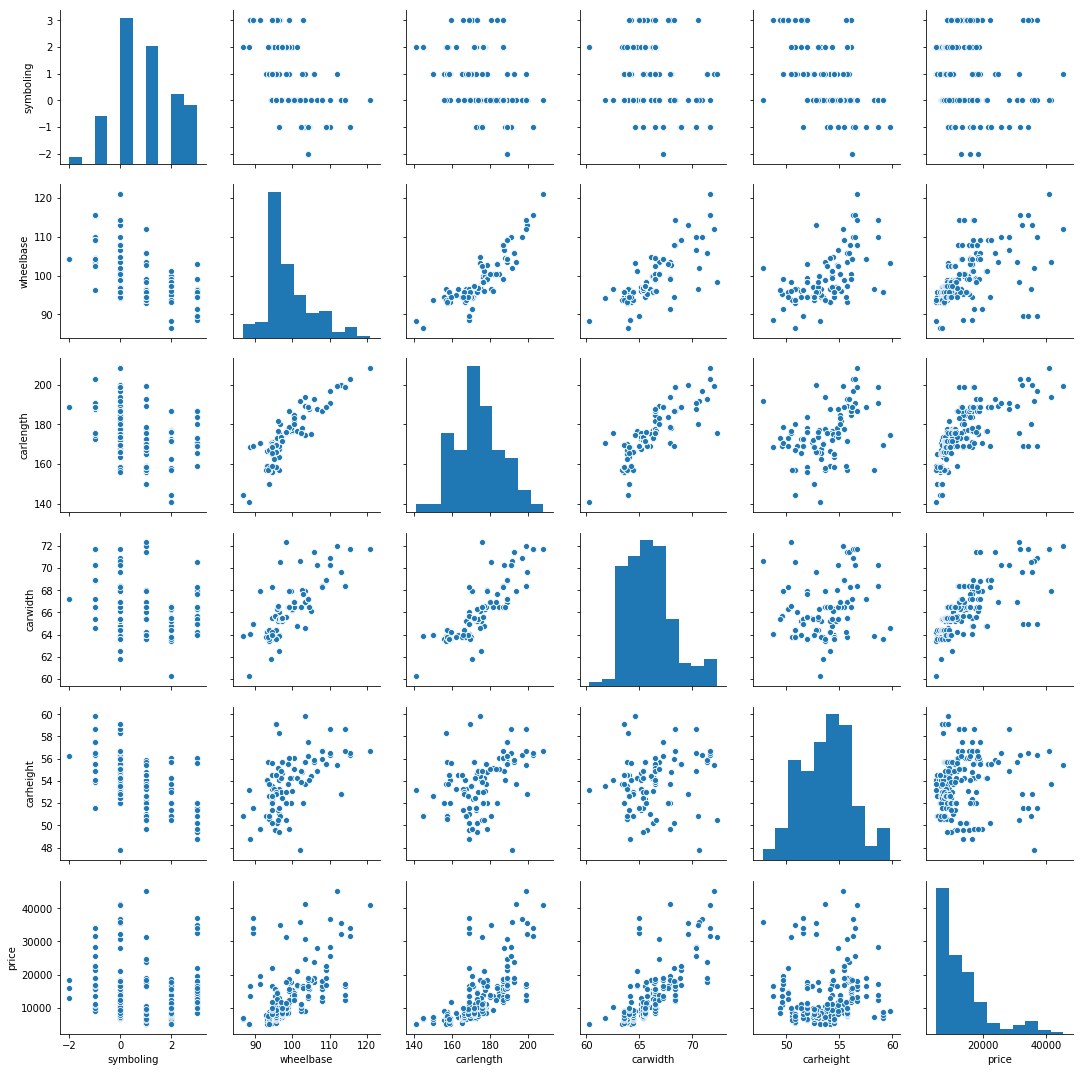

In [16]:
#### visualizing numerical variables

# creating temp_df with target variable price
numeric_pairplot_df = pd.concat([carsprice_numeric_df.iloc[:,:5], carsprice_numeric_df[['price']]], axis=1)

## plotting pair plot for first 5 numerical variables in carsprice dataframe
sns.pairplot(numeric_pairplot_df)


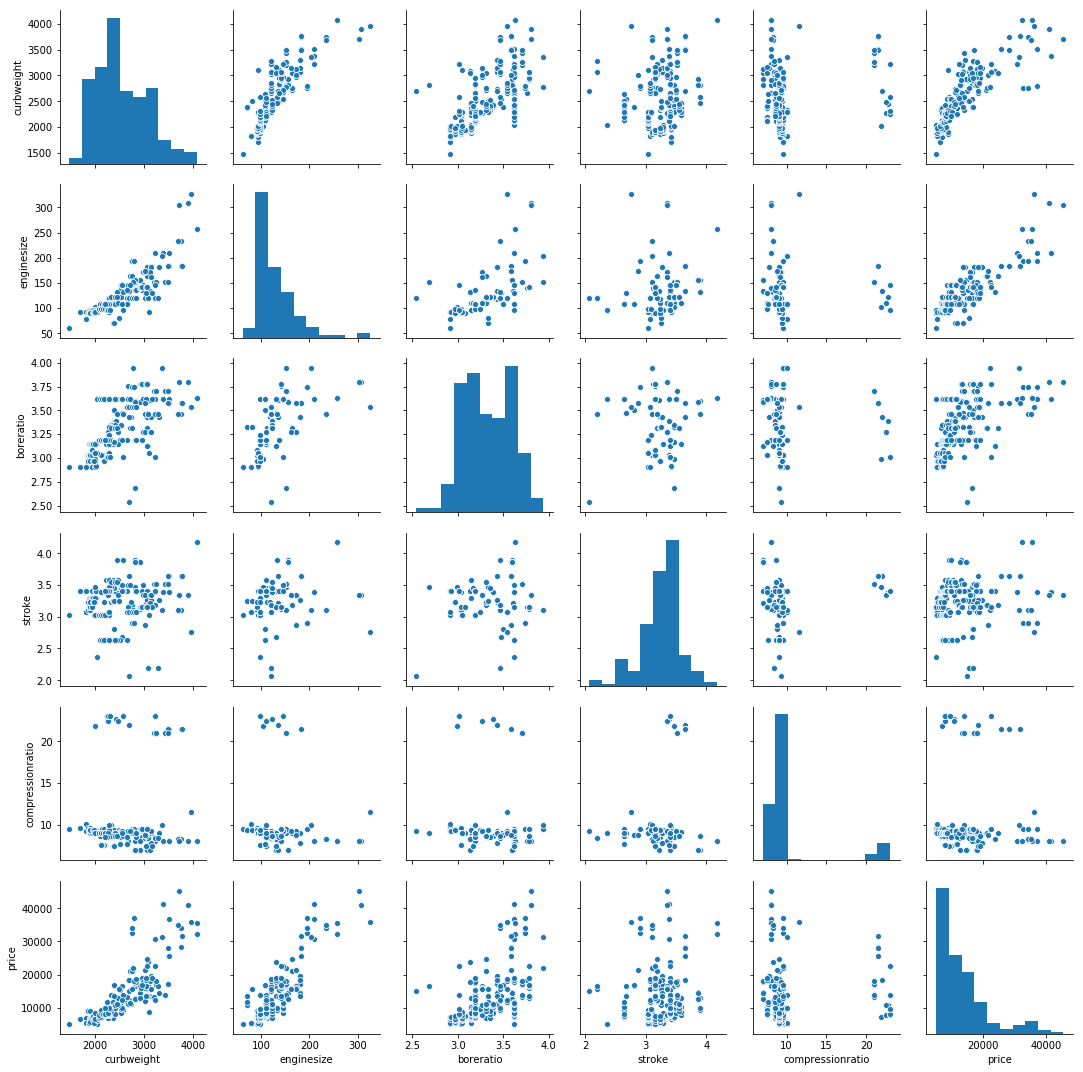

In [17]:

# creating temp_df with target variable price
numeric_pairplot_df = pd.concat([carsprice_numeric_df.iloc[:,5:10], carsprice_numeric_df[['price']]], axis=1)

## plotting pair plot for next 5 numerical variables in carsprice dataframe
sns.pairplot(numeric_pairplot_df)


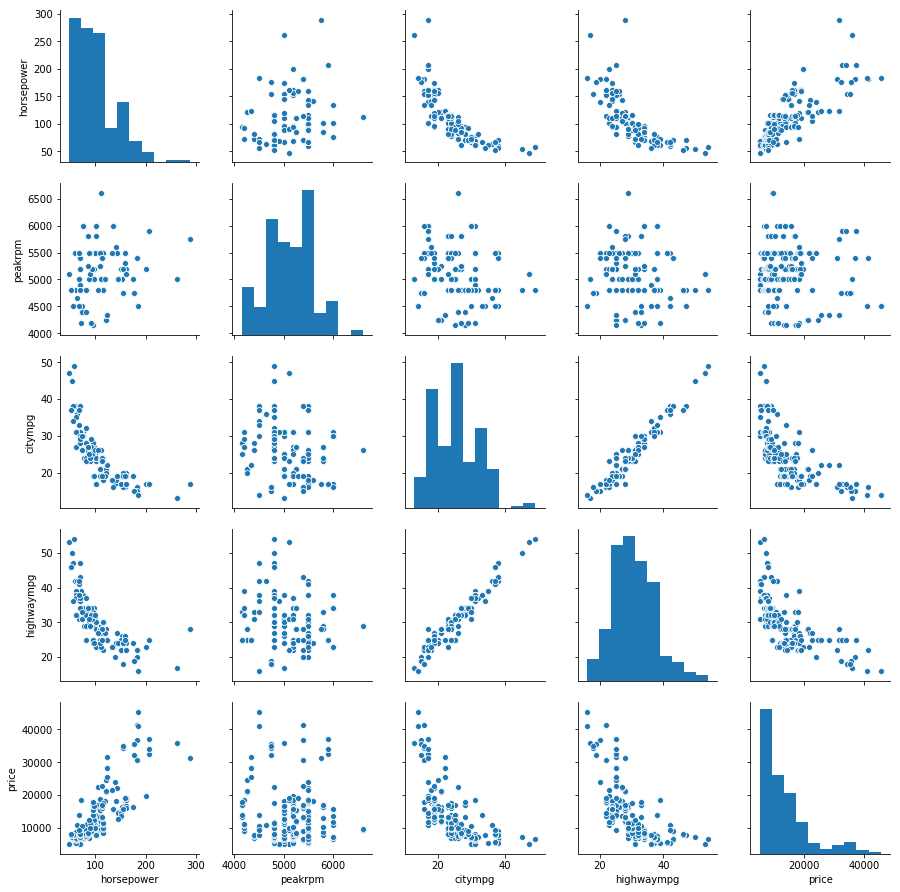

In [18]:
## plotting pair plot for rest all in carsprice dataframe

sns.pairplot(carsprice_numeric_df.iloc[:, 10:])


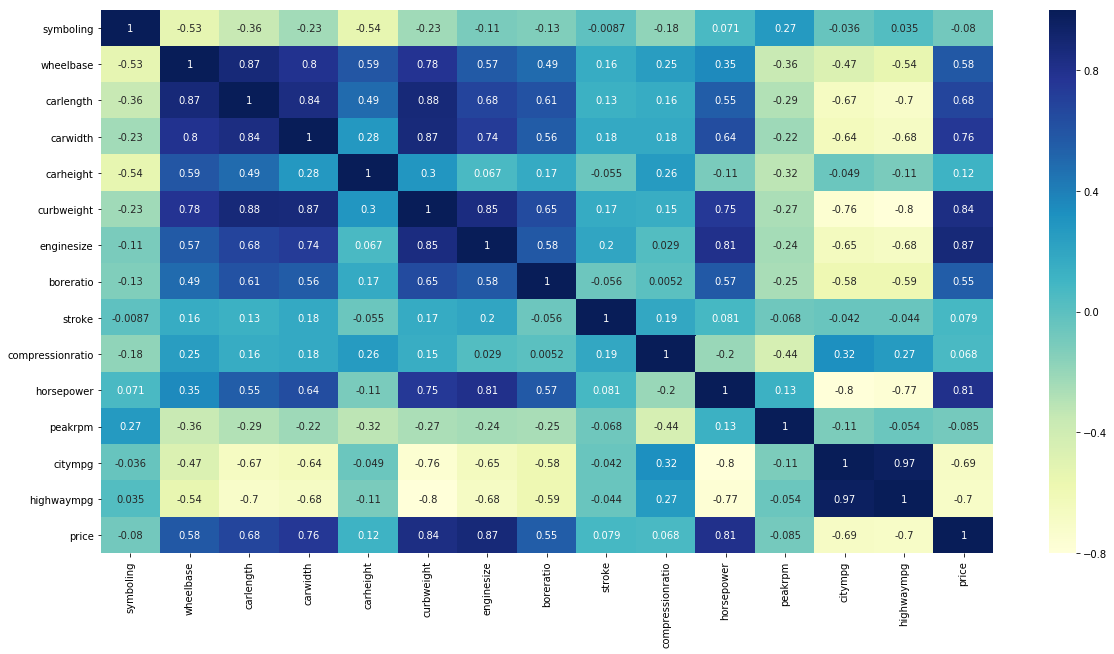

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
#sns.heatmap(carsprice_numeric_df.iloc[:,:].corr(), annot=True, cmap='YlGnBu')
sns.heatmap(carsprice_numeric_df.iloc[:,:].corr(), annot=True, cmap='YlGnBu')

plt.show()

## Inferences after visualizing numerical variables :

### yes we can consider  linear regression model as there are few independent variables which are correlated with dependent target variable 'price'.

### Observed multicollinearity between some variables 

- wheelbase is correlated with carlength, carwidth, carweight
- citympg is correlated highwaympg
- curbweight is correlated with enginesize and boreratio 

### Observed the following variables are correlated with price
- to some extent price is correlated with wheelbase, carlength and carwidth
- price is correlated with horsepower
- price is correlated with enginesize and curbweight


# Categorical Variables Visual Analysis Starts Here

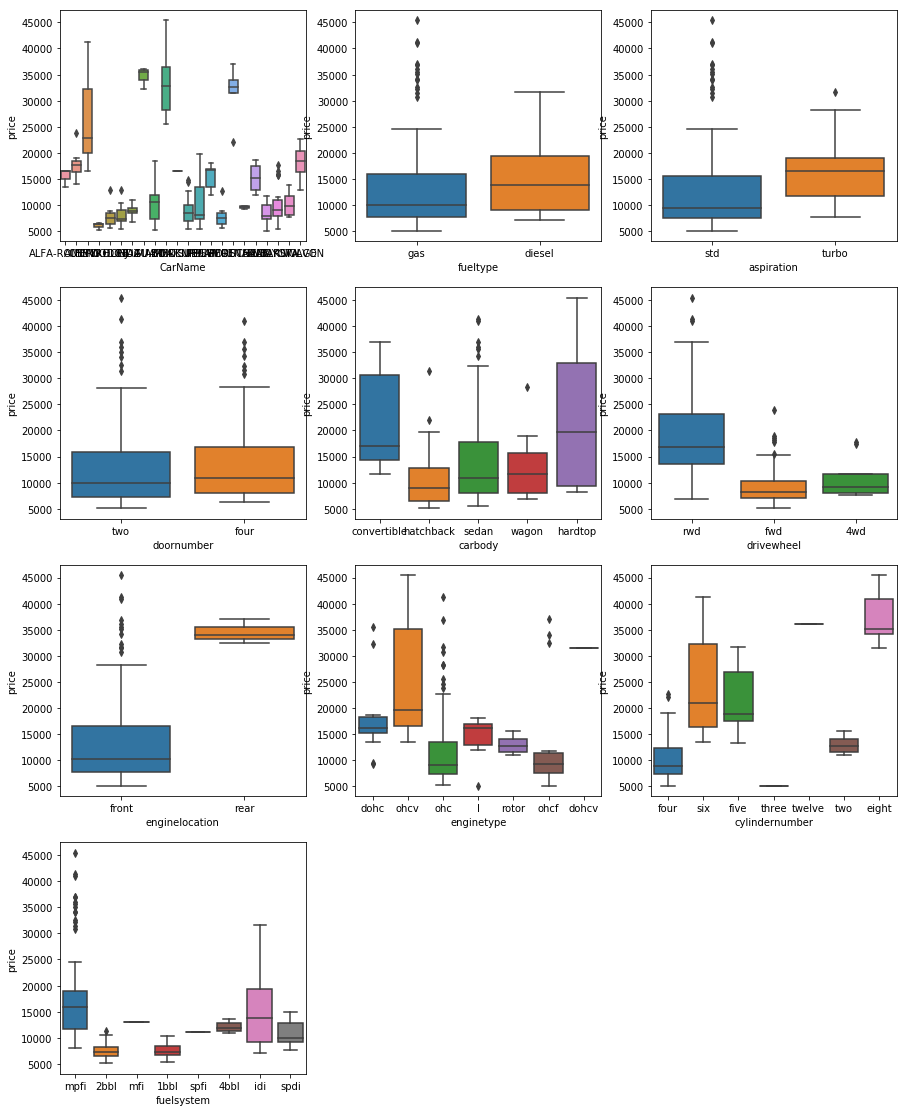

In [23]:
categorical_data = carsprice_df.select_dtypes(include = [np.object])
plt.figure(figsize=(15,40))

plt.xticks(rotation=90)

for i in range(len(categorical_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y='price', x=categorical_data.columns[i], data=carsprice_df)

plt.show()

#### CarName to Price box plt is recreated for better visibility. 


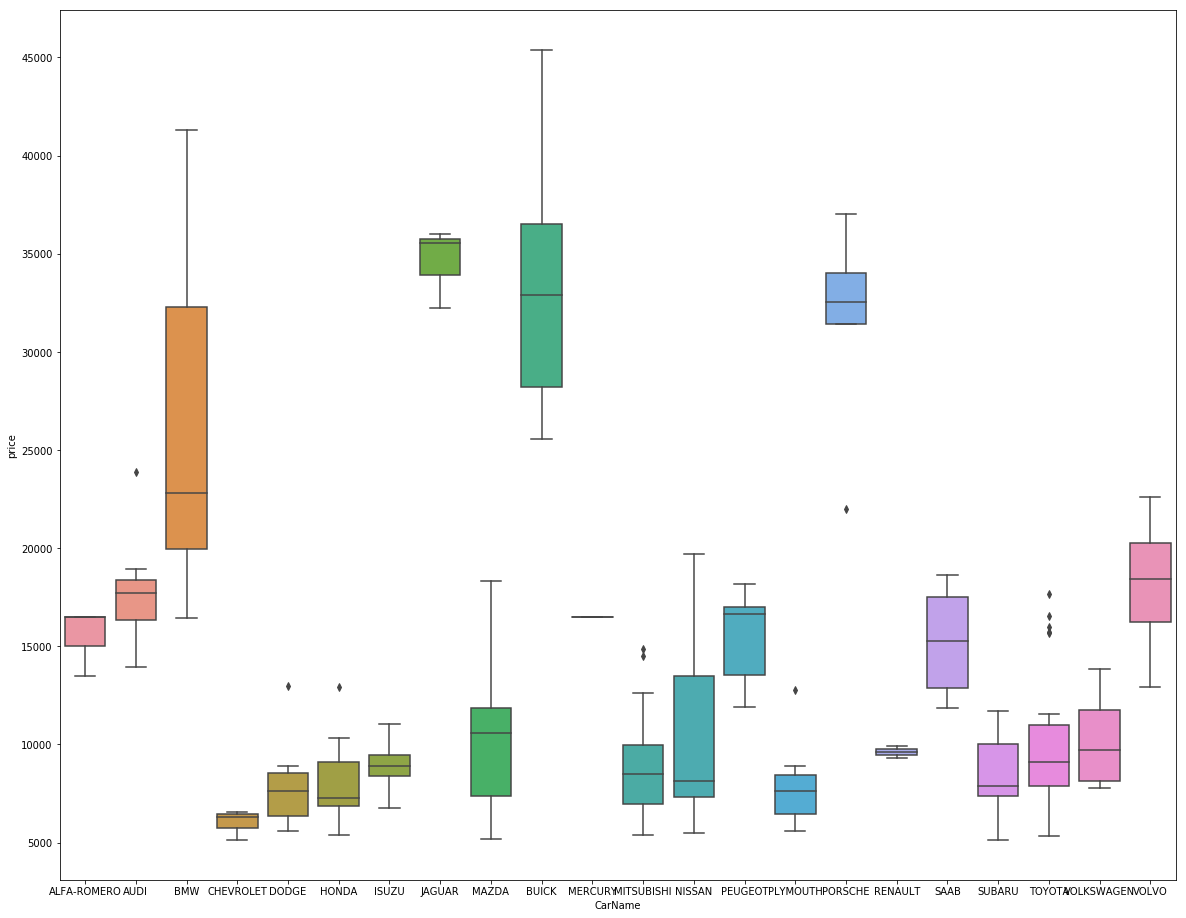

In [24]:
plt.figure(figsize=(20, 16))
sns.boxplot(x='CarName', y='price', data=carsprice_df)

## Inferences drawn after visualizing categorical variables are
- Rear Engine Location is correlated with Price
- There is little correlation between Diesel Fuel Type, Turbo Aspiration and Price
- DriveWheel_rwd is correlated with price
- EngineType dohcv is correlated with price
- CarNames bmw, jaguar, buick, porsche are correlated with price

# <font color = blue> Categorical Variables Visual Analysis Ends Here</font>

# Data Preparation - Preparing the data for modelling Starts Here
- Encoding:
    - Identify binary categorical variables
    - Convert binary categorical variables to 0s and 1s
    - Convert other categorical variables to dummy variables-
- Split the dataset into train dataset and test dataset
- Rescale the variables
    


### Identify Binary Categorical Variables

In [25]:
carsprice_categorical = carsprice_df.select_dtypes(include=object)
carsprice_categorical.head()


CarName fueltype aspiration doornumber      carbody drivewheel  \
0  ALFA-ROMERO      gas        std        two  convertible        rwd   
1  ALFA-ROMERO      gas        std        two  convertible        rwd   
2  ALFA-ROMERO      gas        std        two    hatchback        rwd   
3         AUDI      gas        std       four        sedan        fwd   
4         AUDI      gas        std       four        sedan        4wd   

  enginelocation enginetype cylindernumber fuelsystem  
0          front       dohc           four       mpfi  
1          front       dohc           four       mpfi  
2          front       ohcv            six       mpfi  
3          front        ohc           four       mpfi  
4          front        ohc           five       mpfi

#### List and count of Binary Category Variables

In [26]:
print(carsprice_categorical.enginelocation.value_counts(), end="\n\n")
print(carsprice_categorical.fueltype.value_counts(), end="\n\n")
print(carsprice_categorical.aspiration.value_counts(), end="\n\n")
print(carsprice_categorical.doornumber.value_counts(), end="\n\n")


front    202
rear       3
Name: enginelocation, dtype: int64

gas       185
diesel     20
Name: fueltype, dtype: int64

std      168
turbo     37
Name: aspiration, dtype: int64

four    115
two      90
Name: doornumber, dtype: int64



### Convert Binary Categorical Variables to 0s and 1s
>> - enginelocation <br/>
>> - fueltype <br/>
>> - aspiration <br/>
>> - doornumber <br/>


#### Map Binary Categorical variables to 0s and 1s
#### Ref : https://learn.upgrad.com/v/course/498/session/44763/segment/244252

In [27]:
carsprice_df.enginelocation = carsprice_df.enginelocation.map({'front':1,'rear':0})
carsprice_df.fueltype = carsprice_df.fueltype.map({'gas':1,'diesel':0})
carsprice_df.aspiration = carsprice_df.aspiration.map({'std':1,'turbo':0})
carsprice_df.doornumber = carsprice_df.doornumber.map({'four':1,'two':0})


## Create Dummy Variables  for the categorical variables not of Binary Category

#### Non Binary Categorical Variables

In [28]:
carsprice_categorical = carsprice_df.select_dtypes(include=object)
carsprice_categorical.head(10)

CarName      carbody drivewheel enginetype cylindernumber fuelsystem
0  ALFA-ROMERO  convertible        rwd       dohc           four       mpfi
1  ALFA-ROMERO  convertible        rwd       dohc           four       mpfi
2  ALFA-ROMERO    hatchback        rwd       ohcv            six       mpfi
3         AUDI        sedan        fwd        ohc           four       mpfi
4         AUDI        sedan        4wd        ohc           five       mpfi
5         AUDI        sedan        fwd        ohc           five       mpfi
6         AUDI        sedan        fwd        ohc           five       mpfi
7         AUDI        wagon        fwd        ohc           five       mpfi
8         AUDI        sedan        fwd        ohc           five       mpfi
9         AUDI    hatchback        4wd        ohc           five       mpfi

### Check the number of levels in each categorical variable and create dummy variable for categorical variable having more than 2 levels

In [29]:
print("Levels in CarName = ", len(carsprice_df.CarName.value_counts()), end="\n\n")
print("Levels in carbody = ", len(carsprice_df.carbody.value_counts()), end="\n\n")
print("Levels in drivewheel = ", len(carsprice_df.drivewheel.value_counts()), end="\n\n")
print("Levels in enginetype = ", len(carsprice_df.enginetype.value_counts()), end="\n\n")
print("Levels in cylindernumber = ", len(carsprice_df.cylindernumber.value_counts()), end="\n\n")
print("Levels in fuelsystem = ", len(carsprice_df.fuelsystem.value_counts()), end="\n\n")

Levels in CarName =  22

Levels in carbody =  5

Levels in drivewheel =  3

Levels in enginetype =  7

Levels in cylindernumber =  7

Levels in fuelsystem =  8



#### Idenified tota 52 levels for 6 categorical variables
#### Dummy variables data frame expected to have (52-6=46) 46 columns. 


### converting the following columns to dummy variables 
>> columns :
>>> - CarName
>>> - carbody
>>> - drivewheel
>>> - enginetype
>>> - cylindernumber
>>> - fuelsystem

In [31]:
carsprice_categorical_df = pd.get_dummies(data=carsprice_categorical, drop_first=True)
carsprice_categorical_df.head()


CarName_AUDI  CarName_BMW  CarName_BUICK  CarName_CHEVROLET  CarName_DODGE  \
0             0            0              0                  0              0   
1             0            0              0                  0              0   
2             0            0              0                  0              0   
3             1            0              0                  0              0   
4             1            0              0                  0              0   

   CarName_HONDA  CarName_ISUZU  CarName_JAGUAR  CarName_MAZDA  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   CarName_MERCURY       ...         cylindernumber_three  \
0                0       ...                            0   
1                0       ...                            0   
2                0       ...                            0   
3                0       ...                            0   
4                0       ...                            0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                      0                   0                0   
1                      0                   0                0   
2                      0                   0                0   
3                      0                   0                0   
4                      0                   0                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 46 columns]

## Concatenate dummy variables data frame (carsprice_categorical_df) with the main dataframe(carsprice_df)

In [32]:
carsprice_df = pd.concat([carsprice_df, carsprice_categorical_df], axis=1)
carsprice_df.head()

symboling      CarName  fueltype  aspiration  doornumber      carbody  \
0          3  ALFA-ROMERO         1           1           0  convertible   
1          3  ALFA-ROMERO         1           1           0  convertible   
2          1  ALFA-ROMERO         1           1           0    hatchback   
3          2         AUDI         1           1           1        sedan   
4          2         AUDI         1           1           1        sedan   

  drivewheel  enginelocation  wheelbase  carlength       ...         \
0        rwd               1       88.6      168.8       ...          
1        rwd               1       88.6      168.8       ...          
2        rwd               1       94.5      171.2       ...          
3        fwd               1       99.8      176.6       ...          
4        4wd               1       99.4      176.6       ...          

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

  fuelsystem_2bbl fuelsystem_4bbl  fuelsystem_idi fuelsystem_mfi  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
0                1                0                0  
1                1                0                0  
2                1                0                0  
3                1                0                0  
4                1                0                0  

[5 rows x 71 columns]

## Remove Below Original categorical variables from dataframe
>> columns :
>>> - CarName
>>> - carbody
>>> - drivewheel
>>> - enginetype
>>> - cylindernumber
>>> - fuelsystem

In [33]:

carsprice_df.drop(columns=['CarName', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'], inplace=True)


In [34]:
carsprice_df.info()
carsprice_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
CarName_AUDI             205 non-null uint8

(205, 65)

In [35]:
carsprice_df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0          3         1           1           0               1       88.6   
1          3         1           1           0               1       88.6   
2          1         1           1           0               1       94.5   
3          2         1           1           1               1       99.8   
4          2         1           1           1               1       99.4   

   carlength  carwidth  carheight  curbweight       ...         \
0      168.8      64.1       48.8        2548       ...          
1      168.8      64.1       48.8        2548       ...          
2      171.2      65.5       52.4        2823       ...          
3      176.6      66.2       54.3        2337       ...          
4      176.6      66.4       54.3        2824       ...          

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
0                1                0                0  
1                1                0                0  
2                1                0                0  
3                1                0                0  
4                1                0                0  

[5 rows x 65 columns]

# <font color = blue>Data Preparation - Preparing the data for modelling Ends Here</font>
#  <font color = blue>Data understanding, EDA and preparation Ends Here</font>

# <font color = blue> MODELLING STARTS HERE <font>

### Import Required libraries/packages for Liniear Regression

In [36]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

##  Split the data into train dataset and test dataset Starts Here

In [37]:
print(carsprice_df.shape)
carsprice_df.head()


(205, 65)


symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0          3         1           1           0               1       88.6   
1          3         1           1           0               1       88.6   
2          1         1           1           0               1       94.5   
3          2         1           1           1               1       99.8   
4          2         1           1           1               1       99.4   

   carlength  carwidth  carheight  curbweight       ...         \
0      168.8      64.1       48.8        2548       ...          
1      168.8      64.1       48.8        2548       ...          
2      171.2      65.5       52.4        2823       ...          
3      176.6      66.2       54.3        2337       ...          
4      176.6      66.4       54.3        2824       ...          

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
0                1                0                0  
1                1                0                0  
2                1                0                0  
3                1                0                0  
4                1                0                0  

[5 rows x 65 columns]

#### split the data set into train data and test data with the Training Data as 70% and Test Data as 30%
#### Verify the train and test datasets split

In [38]:
carsprice_df_train, carsprice_df_test = train_test_split(carsprice_df, train_size=0.7, random_state=100)

## checking the shapes of train and test dataset after splitting
print(carsprice_df_train.shape)
print(carsprice_df_test.shape)


(143, 65)
(62, 65)


## Rescale the features of Training Dataset
>> - MinMaxScalar method is used for Rescaling
>> - Create a list of numeric variables
>> - Fit on data

In [39]:

scaler = MinMaxScaler()


numeric_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


carsprice_df_train[numeric_vars] = scaler.fit_transform(carsprice_df_train[numeric_vars])
carsprice_df_train.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
122        0.6         1           1           1               1   0.244828   
125        1.0         1           1           0               1   0.272414   
166        0.6         1           1           0               1   0.272414   
1          1.0         1           1           0               1   0.068966   
199        0.2         1           0           1               1   0.610345   

     carlength  carwidth  carheight  curbweight       ...         \
122   0.426016  0.291667   0.265487    0.272692       ...          
125   0.452033  0.666667   0.212389    0.500388       ...          
166   0.448780  0.308333   0.424779    0.314973       ...          
1     0.450407  0.316667   0.088496    0.411171       ...          
199   0.775610  0.575000   0.858407    0.647401       ...          

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
122                     0                      0                   0   
125                     0                      0                   0   
166                     0                      0                   0   
1                       0                      0                   0   
199                     0                      0                   0   

     fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
122                1                0               0               0   
125                0                0               0               0   
166                0                0               0               0   
1                  0                0               0               0   
199                0                0               0               0   

     fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
122                0                0                0  
125                1                0                0  
166                1                0                0  
1                  1                0                0  
199                1                0                0  

[5 rows x 65 columns]

#### verify scaling of numeric variables

In [40]:
carsprice_df_train[numeric_vars].describe()

symboling   wheelbase   carlength    carwidth   carheight  curbweight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.559441    0.411141    0.525476    0.461655    0.509004    0.407878   
std      0.239200    0.205581    0.204848    0.184517    0.215378    0.211269   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.272414    0.399187    0.304167    0.353982    0.245539   
50%      0.600000    0.341379    0.502439    0.425000    0.522124    0.355702   
75%      0.600000    0.503448    0.669919    0.550000    0.668142    0.559542   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       enginesize   boreratio      stroke  compressionratio  horsepower  \
count  143.000000  143.000000  143.000000        143.000000  143.000000   
mean     0.241351    0.497946    0.535389          0.190787    0.227302   
std      0.154619    0.207140    0.157843          0.237181    0.165511   
min      0.000000    0.000000    0.000000          0.000000    0.000000   
25%      0.135849    0.305556    0.464646          0.100000    0.091667   
50%      0.184906    0.500000    0.545455          0.125000    0.191667   
75%      0.301887    0.682540    0.611111          0.150000    0.283333   
max      1.000000    1.000000    1.000000          1.000000    1.000000   

          peakrpm     citympg  highwaympg       price  
count  143.000000  143.000000  143.000000  143.000000  
mean     0.400029    0.344211    0.374976    0.219310  
std      0.196438    0.186165    0.188477    0.215682  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.265306    0.166667    0.216216    0.067298  
50%      0.428571    0.333333    0.378378    0.140343  
75%      0.551020    0.500000    0.527027    0.313479  
max      1.000000    1.000000    1.000000    1.000000

##### plot the heatmap for first 20 columns to check the correlation between variables after scaling

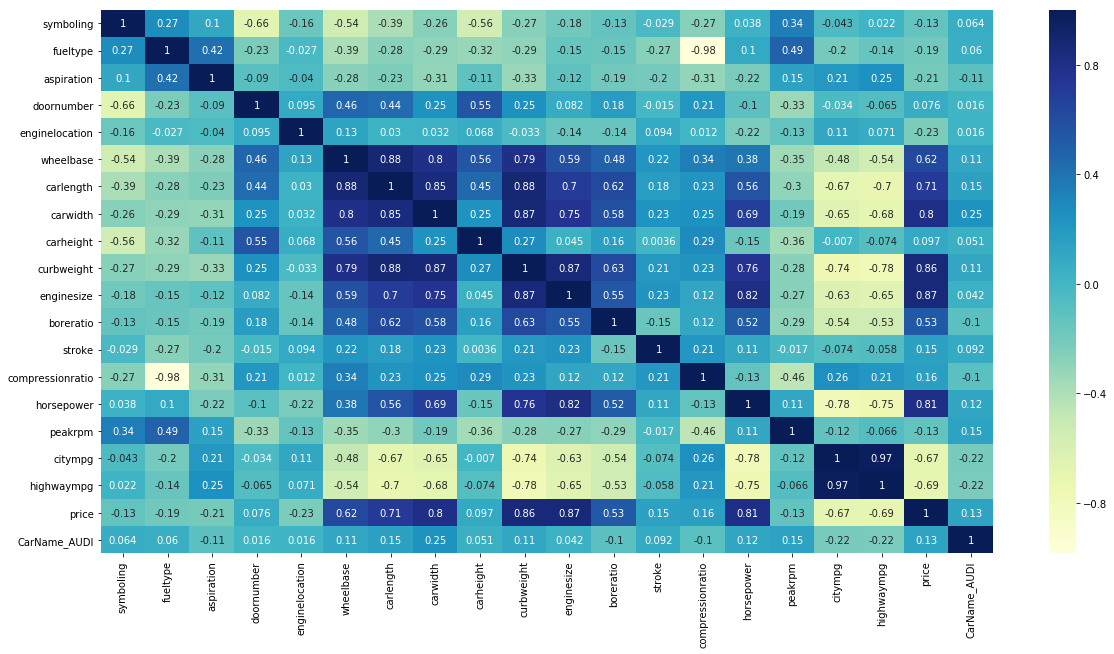

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(carsprice_df_train.iloc[:,:20].corr(), annot=True, cmap='YlGnBu')
plt.show()


##  Split the data into train dataset and test dataset Ends Here

# Model building and evaluation Starts Here

### Training the model
>> - Create y_train by popping price
>> - Create X_train with all other independent variables other than price


In [42]:
y_train = carsprice_df_train.pop('price')
X_train = carsprice_df_train

#### Verify the shapes of X_train and y_train

In [43]:
print(X_train.shape)
print(y_train.shape)

(143, 64)
(143,)


### RFE (Recursive Feature Elimination) Starts Here

>> - Import RFE and LinearRegresion from scikit learn
>> - Create Linear Model
>> - Running RFE with output number of variables equal to 20
>> - Fit the model
>> - List the RFE selected 20 features
>> - List the (64-20=44) 44features eliminated by RFE 
>> - List the RFE selected features along with their ranking on X_train

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)     
rfe = rfe.fit(X_train, y_train)

In [46]:
rfe_selected_features = X_train.columns[rfe.support_]
rfe_selected_features

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'CarName_BMW', 'CarName_PEUGEOT', 'CarName_PORSCHE',
       'CarName_SAAB', 'CarName_SUBARU', 'CarName_VOLVO', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'CarName_AUDI', 'CarName_BUICK',
       'CarName_CHEVROLET', 'CarName_DODGE', 'CarName_HONDA', 'CarName_ISUZU',
       'CarName_JAGUAR', 'CarName_MAZDA', 'CarName_MERCURY',
       'CarName_MITSUBISHI', 'CarName_NISSAN', 'CarName_PLYMOUTH',
       'CarName_RENAULT', 'CarName_TOYOTA', 'CarName_VOLKSWAGEN',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 35),
 ('fueltype', False, 15),
 ('aspiration', False, 4),
 ('doornumber', False, 34),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 16),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 27),
 ('highwaympg', False, 17),
 ('CarName_AUDI', False, 25),
 ('CarName_BMW', True, 1),
 ('CarName_BUICK', False, 26),
 ('CarName_CHEVROLET', False, 13),
 ('CarName_DODGE', False, 10),
 ('CarName_HONDA', False, 12),
 ('CarName_ISUZU', False, 37),
 ('CarName_JAGUAR', False, 18),
 ('CarName_MAZDA', False, 31),
 ('CarName_MERCURY', False, 41),
 ('CarName_MITSUBISHI', False, 3),
 ('CarName_NISSAN', False, 30),
 ('CarName_PEUGEOT', True, 1),
 ('CarName_PLYMOUTH', False, 9),
 ('CarName_PORSCHE', True, 1),
 ('CarName_RENAULT', False, 39),
 ('CarName_SAAB

## Build the model using RFE selected features

>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [49]:
X_train_model_1 = X_train[rfe_selected_features]
X_train_sm = sm.add_constant(X_train_model_1)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           6.19e-71
Time:                        01:09:06   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0930      0.046     -2.006      0.047      -0.185      -0.001
enginelocation           -0.2087      0.039     -5.310      0.000      -0.287      -0.131
carwidth                  0.2790      0.062      4.514      0.000       0.157       0.401
curbweight                0.3011      0.075      4.040      0.000       0.154       0.449
enginesize                1.5805      0.176      9.003      0.000       1.233       1.928
boreratio                -0.4868      0.068     -7.149      0.000      -0.622      -0.352
stroke                   -0.2484      0.047     -5.269      0.000      -0.342      -0.155
CarName_BMW               0.3087      0.027     11.488      0.000       0.256       0.362
CarName_PEUGEOT          -0.1987      0.032     -6.217      0.000      -0.262      -0.135
CarName_PORSCHE           0.2533      0.049      5.173      0.000       0.156       0.350
CarName_SAAB              0.1009      0.036      2.833      0.005       0.030       0.171
CarName_SUBARU           -0.0294      0.046     -0.635      0.526      -0.121       0.062
CarName_VOLVO             0.1111      0.030      3.741      0.000       0.052       0.170
enginetype_l              0.1491      0.026      5.753      0.000       0.098       0.200
enginetype_ohcf           0.0864      0.035      2.453      0.016       0.017       0.156
enginetype_rotor          0.3014      0.036      8.293      0.000       0.229       0.373
cylindernumber_five       0.2198      0.035      6.280      0.000       0.151       0.289
cylindernumber_four       0.2756      0.040      6.838      0.000       0.196       0.355
cylindernumber_three      0.3478      0.050      6.926      0.000       0.248       0.447
cylindernumber_twelve    -0.5489      0.097     -5.673      0.000      -0.740      -0.357
cylindernumber_two        0.3014      0.036      8.293      0.000       0.229       0.373
==============================================================================
Omnibus:                       25.635   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.867
Skew:                           0.797   Prob(JB):                     1.48e-11
Kurtosis:                       5.414   Cond. No.                     1.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Inferences Drawn :
>> - By observing Probability most of the bariables looks like significant except for below
>>> -  CarName_SUBARU
>> - R-Squared and Adjusted R-Squared looks ok but might be chances of overfitting the model with the current set of variables 
#### Warnings produced by the output
Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.<br/>
[2] The smallest eigenvalue is 1.83e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

To address the second warning required further analysis of parmaeters with VIF method


## Checking VIF

>> - Create a dataframe that will contain the names of all the feature variables and their respective VIFs


In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_1.values, i) for i in range(X_train_model_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features        VIF
19     cylindernumber_two        inf
7         CarName_PEUGEOT        inf
17   cylindernumber_three        inf
14       enginetype_rotor        inf
12           enginetype_l        inf
0          enginelocation  79.100000
3              enginesize  37.130000
10         CarName_SUBARU  32.000000
13        enginetype_ohcf  25.130000
16    cylindernumber_four  15.810000
2              curbweight  12.500000
4               boreratio  10.030000
1                carwidth   6.550000
15    cylindernumber_five   3.670000
18  cylindernumber_twelve   3.300000
5                  stroke   2.790000
8         CarName_PORSCHE   2.500000
11          CarName_VOLVO   1.800000
6             CarName_BMW   1.470000
9            CarName_SAAB   1.320000

### Drop CarName_SUBARU feature as it has high P-value(0.526) and high VIF (32.000000)
### Rebuilding the model after removing CarName_SUBARU

>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [51]:

X_train_model_2 = X_train_model_1.drop(columns=['CarName_SUBARU'])
X_train_sm = sm.add_constant(X_train_model_2)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           6.19e-71
Time:                        01:09:19   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0637      0.091     -0.703      0.483      -0.243       0.116
enginelocation           -0.2381      0.081     -2.957      0.004      -0.397      -0.079
carwidth                  0.2790      0.062      4.514      0.000       0.157       0.401
curbweight                0.3011      0.075      4.040      0.000       0.154       0.449
enginesize                1.5805      0.176      9.003      0.000       1.233       1.928
boreratio                -0.4868      0.068     -7.149      0.000      -0.622      -0.352
stroke                   -0.2484      0.047     -5.269      0.000      -0.342      -0.155
CarName_BMW               0.3087      0.027     11.488      0.000       0.256       0.362
CarName_PEUGEOT          -0.1987      0.032     -6.217      0.000      -0.262      -0.135
CarName_PORSCHE           0.2533      0.049      5.173      0.000       0.156       0.350
CarName_SAAB              0.1009      0.036      2.833      0.005       0.030       0.171
CarName_VOLVO             0.1111      0.030      3.741      0.000       0.052       0.170
enginetype_l              0.1491      0.026      5.753      0.000       0.098       0.200
enginetype_ohcf           0.0570      0.031      1.868      0.064      -0.003       0.117
enginetype_rotor          0.3014      0.036      8.293      0.000       0.229       0.373
cylindernumber_five       0.2198      0.035      6.280      0.000       0.151       0.289
cylindernumber_four       0.2756      0.040      6.838      0.000       0.196       0.355
cylindernumber_three      0.3478      0.050      6.926      0.000       0.248       0.447
cylindernumber_twelve    -0.5489      0.097     -5.673      0.000      -0.740      -0.357
cylindernumber_two        0.3014      0.036      8.293      0.000       0.229       0.373
==============================================================================
Omnibus:                       25.635   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.867
Skew:                           0.797   Prob(JB):                     1.48e-11
Kurtosis:                       5.414   Cond. No.                     9.60e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.53e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Check the latest VIFs

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_2.values, i) for i in range(X_train_model_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features        VIF
18     cylindernumber_two        inf
7         CarName_PEUGEOT        inf
16   cylindernumber_three        inf
13       enginetype_rotor        inf
11           enginetype_l        inf
3              enginesize  98.500000
0          enginelocation  62.510000
2              curbweight  59.330000
4               boreratio  52.550000
15    cylindernumber_four  48.150000
1                carwidth  44.810000
5                  stroke  34.470000
14    cylindernumber_five   3.200000
17  cylindernumber_twelve   3.000000
12        enginetype_ohcf   2.610000
10          CarName_VOLVO   1.610000
8         CarName_PORSCHE   1.470000
6             CarName_BMW   1.440000
9            CarName_SAAB   1.260000

###  Decided to Drop the column 'enginetype_ohcf' as it has high P-value (0.064) and low VIF(2.610000) value
### Rebuild the model after removing 'enginetype_ohcf' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [53]:
X_train_model_3 = X_train_model_2.drop(columns=['enginetype_ohcf'])
X_train_sm = sm.add_constant(X_train_model_3)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           2.89e-71
Time:                        01:09:30   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0352      0.074      0.474      0.636      -0.112       0.182
enginelocation           -0.3058      0.073     -4.212      0.000      -0.449      -0.162
carwidth                  0.2950      0.062      4.772      0.000       0.173       0.417
curbweight                0.2985      0.075      3.966      0.000       0.150       0.447
enginesize                1.4561      0.164      8.876      0.000       1.131       1.781
boreratio                -0.4064      0.053     -7.625      0.000      -0.512      -0.301
stroke                   -0.2777      0.045     -6.188      0.000      -0.367      -0.189
CarName_BMW               0.2922      0.026     11.402      0.000       0.241       0.343
CarName_PEUGEOT          -0.2009      0.032     -6.227      0.000      -0.265      -0.137
CarName_PORSCHE           0.2118      0.044      4.806      0.000       0.125       0.299
CarName_SAAB              0.0765      0.033      2.286      0.024       0.010       0.143
CarName_VOLVO             0.0850      0.026      3.212      0.002       0.033       0.137
enginetype_l              0.1313      0.024      5.395      0.000       0.083       0.179
enginetype_rotor          0.2726      0.033      8.202      0.000       0.207       0.338
cylindernumber_five       0.1997      0.034      5.938      0.000       0.133       0.266
cylindernumber_four       0.2483      0.038      6.546      0.000       0.173       0.323
cylindernumber_three      0.3322      0.050      6.643      0.000       0.233       0.431
cylindernumber_twelve    -0.5132      0.096     -5.358      0.000      -0.703      -0.324
cylindernumber_two        0.2726      0.033      8.202      0.000       0.207       0.338
==============================================================================
Omnibus:                       22.837   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.491
Skew:                           0.682   Prob(JB):                     4.87e-11
Kurtosis:                       5.472   Cond. No.                     7.13e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.99e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Check the latest VIFs

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_3.values, i) for i in range(X_train_model_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features        VIF
17     cylindernumber_two        inf
7         CarName_PEUGEOT        inf
15   cylindernumber_three        inf
12       enginetype_rotor        inf
11           enginetype_l        inf
3              enginesize  96.640000
0          enginelocation  59.700000
2              curbweight  59.190000
14    cylindernumber_four  47.330000
1                carwidth  44.800000
4               boreratio  39.770000
5                  stroke  31.020000
13    cylindernumber_five   3.180000
16  cylindernumber_twelve   3.000000
8         CarName_PORSCHE   1.450000
10          CarName_VOLVO   1.430000
6             CarName_BMW   1.360000
9            CarName_SAAB   1.160000

### Remove 'cylindernumber_two' column as it has high VIF
### Rebuild the model after removing the 'cylindernumber_two' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [55]:
X_train_model_4 = X_train_model_3.drop(columns=['cylindernumber_two'])
X_train_sm = sm.add_constant(X_train_model_4)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           2.89e-71
Time:                        01:09:38   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0352      0.074      0.474      0.636      -0.112       0.182
enginelocation           -0.3058      0.073     -4.212      0.000      -0.449      -0.162
carwidth                  0.2950      0.062      4.772      0.000       0.173       0.417
curbweight                0.2985      0.075      3.966      0.000       0.150       0.447
enginesize                1.4561      0.164      8.876      0.000       1.131       1.781
boreratio                -0.4064      0.053     -7.625      0.000      -0.512      -0.301
stroke                   -0.2777      0.045     -6.188      0.000      -0.367      -0.189
CarName_BMW               0.2922      0.026     11.402      0.000       0.241       0.343
CarName_PEUGEOT          -0.2009      0.032     -6.227      0.000      -0.265      -0.137
CarName_PORSCHE           0.2118      0.044      4.806      0.000       0.125       0.299
CarName_SAAB              0.0765      0.033      2.286      0.024       0.010       0.143
CarName_VOLVO             0.0850      0.026      3.212      0.002       0.033       0.137
enginetype_l              0.1313      0.024      5.395      0.000       0.083       0.179
enginetype_rotor          0.5451      0.066      8.202      0.000       0.414       0.677
cylindernumber_five       0.1997      0.034      5.938      0.000       0.133       0.266
cylindernumber_four       0.2483      0.038      6.546      0.000       0.173       0.323
cylindernumber_three      0.3322      0.050      6.643      0.000       0.233       0.431
cylindernumber_twelve    -0.5132      0.096     -5.358      0.000      -0.703      -0.324
==============================================================================
Omnibus:                       22.837   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.491
Skew:                           0.682   Prob(JB):                     4.87e-11
Kurtosis:                       5.472   Cond. No.                     5.65e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Check Latest VIFs

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_4.values, i) for i in range(X_train_model_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features        VIF
15   cylindernumber_three        inf
7         CarName_PEUGEOT        inf
11           enginetype_l        inf
3              enginesize  96.640000
0          enginelocation  59.700000
2              curbweight  59.190000
14    cylindernumber_four  47.330000
1                carwidth  44.800000
4               boreratio  39.770000
5                  stroke  31.020000
12       enginetype_rotor   5.460000
13    cylindernumber_five   3.180000
16  cylindernumber_twelve   3.000000
8         CarName_PORSCHE   1.450000
10          CarName_VOLVO   1.430000
6             CarName_BMW   1.360000
9            CarName_SAAB   1.160000

### Removing 'cylindernumber_three' column as it has high VIF
### Rebuilding the model after removing the 'cylindernumber_three' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [57]:

X_train_model_5 = X_train_model_4.drop(columns=['cylindernumber_three'])
X_train_sm = sm.add_constant(X_train_model_5)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           2.89e-71
Time:                        01:09:47   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0352      0.074      0.474      0.636      -0.112       0.182
enginelocation           -0.3058      0.073     -4.212      0.000      -0.449      -0.162
carwidth                  0.2950      0.062      4.772      0.000       0.173       0.417
curbweight                0.2985      0.075      3.966      0.000       0.150       0.447
enginesize                1.4561      0.164      8.876      0.000       1.131       1.781
boreratio                -0.4064      0.053     -7.625      0.000      -0.512      -0.301
stroke                   -0.2777      0.045     -6.188      0.000      -0.367      -0.189
CarName_BMW               0.2922      0.026     11.402      0.000       0.241       0.343
CarName_PEUGEOT          -0.5331      0.081     -6.617      0.000      -0.693      -0.374
CarName_PORSCHE           0.2118      0.044      4.806      0.000       0.125       0.299
CarName_SAAB              0.0765      0.033      2.286      0.024       0.010       0.143
CarName_VOLVO             0.0850      0.026      3.212      0.002       0.033       0.137
enginetype_l              0.4635      0.072      6.461      0.000       0.322       0.605
enginetype_rotor          0.5451      0.066      8.202      0.000       0.414       0.677
cylindernumber_five       0.1997      0.034      5.938      0.000       0.133       0.266
cylindernumber_four       0.2483      0.038      6.546      0.000       0.173       0.323
cylindernumber_twelve    -0.5132      0.096     -5.358      0.000      -0.703      -0.324
==============================================================================
Omnibus:                       22.837   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.491
Skew:                           0.682   Prob(JB):                     4.87e-11
Kurtosis:                       5.472   Cond. No.                         89.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Verify the latest VIFs

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_5.values, i) for i in range(X_train_model_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features    VIF
3              enginesize  96.64
0          enginelocation  59.70
2              curbweight  59.19
14    cylindernumber_four  47.33
1                carwidth  44.80
4               boreratio  39.77
5                  stroke  31.02
7         CarName_PEUGEOT  17.70
11           enginetype_l  15.53
12       enginetype_rotor   5.46
13    cylindernumber_five   3.18
15  cylindernumber_twelve   3.00
8         CarName_PORSCHE   1.45
10          CarName_VOLVO   1.43
6             CarName_BMW   1.36
9            CarName_SAAB   1.16

### Remove 'enginesize' column as it has high VIF
### Rebuild the model after removing the 'enginesize' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [59]:
X_train_model_6 = X_train_model_5.drop(columns=['enginesize'])
X_train_sm = sm.add_constant(X_train_model_6)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     86.57
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           4.59e-59
Time:                        01:09:56   Log-Likelihood:                 189.84
No. Observations:                 143   AIC:                            -347.7
Df Residuals:                     127   BIC:                            -300.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2632      0.088      2.977      0.003       0.088       0.438
enginelocation           -0.4239      0.091     -4.677      0.000      -0.603      -0.245
carwidth                  0.3733      0.078      4.804      0.000       0.220       0.527
curbweight                0.6350      0.083      7.693      0.000       0.472       0.798
boreratio                -0.0905      0.050     -1.796      0.075      -0.190       0.009
stroke                   -0.0250      0.044     -0.566      0.572      -0.112       0.062
CarName_BMW               0.2675      0.032      8.269      0.000       0.203       0.332
CarName_PEUGEOT          -0.3340      0.098     -3.399      0.001      -0.528      -0.140
CarName_PORSCHE           0.1620      0.056      2.918      0.004       0.052       0.272
CarName_SAAB              0.0188      0.042      0.451      0.653      -0.064       0.101
CarName_VOLVO             0.0035      0.032      0.111      0.912      -0.059       0.066
enginetype_l              0.1887      0.082      2.296      0.023       0.026       0.351
enginetype_rotor          0.0437      0.044      0.983      0.328      -0.044       0.132
cylindernumber_five      -0.0099      0.030     -0.325      0.746      -0.070       0.050
cylindernumber_four      -0.0080      0.031     -0.257      0.798      -0.070       0.054
cylindernumber_twelve     0.1559      0.075      2.078      0.040       0.007       0.304
==============================================================================
Omnibus:                       22.459   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.476
Skew:                           0.663   Prob(JB):                     4.91e-11
Kurtosis:                       5.492   Cond. No.                         46.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_6.values, i) for i in range(X_train_model_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features    VIF
0          enginelocation  55.39
1                carwidth  44.55
2              curbweight  43.36
3               boreratio  22.62
13    cylindernumber_four  22.05
4                  stroke  17.94
6         CarName_PEUGEOT  16.62
10           enginetype_l  13.08
12    cylindernumber_five   1.77
11       enginetype_rotor   1.69
7         CarName_PORSCHE   1.45
5             CarName_BMW   1.35
9           CarName_VOLVO   1.28
14  cylindernumber_twelve   1.21
8            CarName_SAAB   1.12

### Remove 'cylindernumber_four' column as it has high P-value and high VIF
### Rebuild the model after removing the 'cylindernumber_four' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [61]:
X_train_model_7 = X_train_model_6.drop(columns=['cylindernumber_four'])
X_train_sm = sm.add_constant(X_train_model_7)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.43
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           4.81e-60
Time:                        01:10:03   Log-Likelihood:                 189.81
No. Observations:                 143   AIC:                            -349.6
Df Residuals:                     128   BIC:                            -305.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2608      0.088      2.977      0.003       0.087       0.434
enginelocation           -0.4296      0.087     -4.911      0.000      -0.603      -0.257
carwidth                  0.3768      0.076      4.945      0.000       0.226       0.528
curbweight                0.6484      0.064     10.160      0.000       0.522       0.775
boreratio                -0.0975      0.042     -2.312      0.022      -0.181      -0.014
stroke                   -0.0280      0.042     -0.662      0.509      -0.112       0.056
CarName_BMW               0.2706      0.030      9.049      0.000       0.211       0.330
CarName_PEUGEOT          -0.3493      0.078     -4.485      0.000      -0.503      -0.195
CarName_PORSCHE           0.1635      0.055      2.971      0.004       0.055       0.272
CarName_SAAB              0.0167      0.041      0.410      0.682      -0.064       0.097
CarName_VOLVO             0.0025      0.031      0.081      0.936      -0.059       0.064
enginetype_l              0.1995      0.070      2.832      0.005       0.060       0.339
enginetype_rotor          0.0508      0.035      1.460      0.147      -0.018       0.120
cylindernumber_five      -0.0073      0.029     -0.254      0.800      -0.064       0.049
cylindernumber_twelve     0.1540      0.074      2.071      0.040       0.007       0.301
==============================================================================
Omnibus:                       22.349   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.946
Skew:                           0.654   Prob(JB):                     3.88e-11
Kurtosis:                       5.517   Cond. No.                         40.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_7.values, i) for i in range(X_train_model_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features    VIF
1                carwidth  42.77
2              curbweight  26.39
0          enginelocation  25.62
4                  stroke  16.35
3               boreratio  15.63
6         CarName_PEUGEOT  10.55
10           enginetype_l   9.70
12    cylindernumber_five   1.58
7         CarName_PORSCHE   1.44
9           CarName_VOLVO   1.26
13  cylindernumber_twelve   1.20
5             CarName_BMW   1.17
8            CarName_SAAB   1.08
11       enginetype_rotor   1.05

### Remove 'stroke' column as it has high P-value and high VIF
### Rebuild the model after removing the 'stroke' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [63]:
X_train_model_8 = X_train_model_7.drop(columns=['stroke'])
X_train_sm = sm.add_constant(X_train_model_8)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           5.81e-61
Time:                        01:10:11   Log-Likelihood:                 189.56
No. Observations:                 143   AIC:                            -351.1
Df Residuals:                     129   BIC:                            -309.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2472      0.085      2.909      0.004       0.079       0.415
enginelocation           -0.4296      0.087     -4.921      0.000      -0.602      -0.257
carwidth                  0.3686      0.075      4.913      0.000       0.220       0.517
curbweight                0.6408      0.063     10.230      0.000       0.517       0.765
boreratio                -0.0880      0.040     -2.224      0.028      -0.166      -0.010
CarName_BMW               0.2729      0.030      9.204      0.000       0.214       0.332
CarName_PEUGEOT          -0.3467      0.078     -4.467      0.000      -0.500      -0.193
CarName_PORSCHE           0.1659      0.055      3.029      0.003       0.058       0.274
CarName_SAAB              0.0192      0.040      0.475      0.636      -0.061       0.099
CarName_VOLVO             0.0055      0.031      0.179      0.858      -0.055       0.066
enginetype_l              0.1993      0.070      2.837      0.005       0.060       0.338
enginetype_rotor          0.0507      0.035      1.461      0.147      -0.018       0.119
cylindernumber_five      -0.0059      0.028     -0.208      0.835      -0.062       0.050
cylindernumber_twelve     0.1672      0.071      2.338      0.021       0.026       0.309
==============================================================================
Omnibus:                       22.450   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.423
Skew:                           0.672   Prob(JB):                     8.31e-11
Kurtosis:                       5.447   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_8.values, i) for i in range(X_train_model_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features    VIF
1                carwidth  42.15
2              curbweight  25.22
3               boreratio  14.07
0          enginelocation  13.56
5         CarName_PEUGEOT  10.52
9            enginetype_l   9.70
11    cylindernumber_five   1.58
6         CarName_PORSCHE   1.44
8           CarName_VOLVO   1.24
4             CarName_BMW   1.15
12  cylindernumber_twelve   1.12
7            CarName_SAAB   1.07
10       enginetype_rotor   1.05

### Removing 'CarName_VOLVO' column as it has high P-value(0.858) and low VIF
### Rebuilding the model after removing the 'CarName_VOLVO' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters


In [65]:
X_train_model_9 = X_train_model_8.drop(columns=['CarName_VOLVO'])
X_train_sm = sm.add_constant(X_train_model_9)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     110.3
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           5.49e-62
Time:                        01:10:19   Log-Likelihood:                 189.54
No. Observations:                 143   AIC:                            -353.1
Df Residuals:                     130   BIC:                            -314.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2473      0.085      2.921      0.004       0.080       0.415
enginelocation           -0.4307      0.087     -4.965      0.000      -0.602      -0.259
carwidth                  0.3708      0.074      5.029      0.000       0.225       0.517
curbweight                0.6406      0.062     10.267      0.000       0.517       0.764
boreratio                -0.0868      0.039     -2.233      0.027      -0.164      -0.010
CarName_BMW               0.2722      0.029      9.294      0.000       0.214       0.330
CarName_PEUGEOT          -0.3487      0.077     -4.554      0.000      -0.500      -0.197
CarName_PORSCHE           0.1641      0.054      3.059      0.003       0.058       0.270
CarName_SAAB              0.0185      0.040      0.460      0.646      -0.061       0.098
enginetype_l              0.2002      0.070      2.865      0.005       0.062       0.338
enginetype_rotor          0.0502      0.034      1.457      0.148      -0.018       0.118
cylindernumber_five      -0.0069      0.028     -0.250      0.803      -0.062       0.048
cylindernumber_twelve     0.1658      0.071      2.342      0.021       0.026       0.306
==============================================================================
Omnibus:                       21.915   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.782
Skew:                           0.660   Prob(JB):                     1.89e-10
Kurtosis:                       5.403   Cond. No.                         37.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_9.values, i) for i in range(X_train_model_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features    VIF
1                carwidth  41.00
2              curbweight  25.22
3               boreratio  13.71
0          enginelocation  12.51
5         CarName_PEUGEOT  10.32
8            enginetype_l   9.66
10    cylindernumber_five   1.52
6         CarName_PORSCHE   1.37
4             CarName_BMW   1.13
11  cylindernumber_twelve   1.10
7            CarName_SAAB   1.06
9        enginetype_rotor   1.05

### Remove 'cylindernumber_five' column as it has high P-value and low VIF
### Rebuild the model after removing the 'cylindernumber_five' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [67]:
X_train_model_10 = X_train_model_9.drop(columns=['cylindernumber_five']) 
X_train_sm = sm.add_constant(X_train_model_10)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.1
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           5.02e-63
Time:                        01:10:26   Log-Likelihood:                 189.51
No. Observations:                 143   AIC:                            -355.0
Df Residuals:                     131   BIC:                            -319.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2459      0.084      2.922      0.004       0.079       0.412
enginelocation           -0.4280      0.086     -4.991      0.000      -0.598      -0.258
carwidth                  0.3637      0.068      5.373      0.000       0.230       0.498
curbweight                0.6416      0.062     10.340      0.000       0.519       0.764
boreratio                -0.0847      0.038     -2.239      0.027      -0.160      -0.010
CarName_BMW               0.2729      0.029      9.397      0.000       0.215       0.330
CarName_PEUGEOT          -0.3456      0.075     -4.589      0.000      -0.495      -0.197
CarName_PORSCHE           0.1661      0.053      3.143      0.002       0.062       0.271
CarName_SAAB              0.0190      0.040      0.476      0.635      -0.060       0.098
enginetype_l              0.1985      0.069      2.865      0.005       0.061       0.336
enginetype_rotor          0.0508      0.034      1.480      0.141      -0.017       0.119
cylindernumber_twelve     0.1683      0.070      2.410      0.017       0.030       0.306
==============================================================================
Omnibus:                       22.616   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.994
Skew:                           0.675   Prob(JB):                     6.24e-11
Kurtosis:                       5.463   Cond. No.                         36.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_10.values, i) for i in range(X_train_model_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features    VIF
1                carwidth  34.95
2              curbweight  25.15
3               boreratio  13.10
0          enginelocation  11.69
5         CarName_PEUGEOT  10.06
8            enginetype_l   9.57
6         CarName_PORSCHE   1.35
4             CarName_BMW   1.12
10  cylindernumber_twelve   1.08
7            CarName_SAAB   1.06
9        enginetype_rotor   1.04

### Remove 'CarName_SAAB' column as it has high P-value and low VIF
### Rebuild the model after removing the 'CarName_SAAB' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [69]:
X_train_model_11 = X_train_model_10.drop(columns=['CarName_SAAB'])
X_train_sm = sm.add_constant(X_train_model_11)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           4.72e-64
Time:                        01:10:33   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2454      0.084      2.925      0.004       0.079       0.411
enginelocation           -0.4282      0.085     -5.008      0.000      -0.597      -0.259
carwidth                  0.3631      0.067      5.382      0.000       0.230       0.497
curbweight                0.6418      0.062     10.374      0.000       0.519       0.764
boreratio                -0.0820      0.037     -2.199      0.030      -0.156      -0.008
CarName_BMW               0.2720      0.029      9.413      0.000       0.215       0.329
CarName_PEUGEOT          -0.3469      0.075     -4.622      0.000      -0.495      -0.198
CarName_PORSCHE           0.1644      0.053      3.126      0.002       0.060       0.268
enginetype_l              0.1987      0.069      2.875      0.005       0.062       0.335
enginetype_rotor          0.0502      0.034      1.468      0.145      -0.017       0.118
cylindernumber_twelve     0.1673      0.070      2.405      0.018       0.030       0.305
==============================================================================
Omnibus:                       22.096   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.356
Skew:                           0.664   Prob(JB):                     1.42e-10
Kurtosis:                       5.419   Cond. No.                         36.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_11.values, i) for i in range(X_train_model_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features    VIF
1               carwidth  34.94
2             curbweight  25.14
3              boreratio  12.80
0         enginelocation  11.64
5        CarName_PEUGEOT  10.04
7           enginetype_l   9.57
6        CarName_PORSCHE   1.34
4            CarName_BMW   1.12
9  cylindernumber_twelve   1.08
8       enginetype_rotor   1.04

### Remove 'enginetype_rotor' column as it has high P-value and low VIF
### Rebuild the model after removing the 'enginetype_rotor' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [71]:
X_train_model_12 = X_train_model_11.drop(columns=['enginetype_rotor'])
X_train_sm = sm.add_constant(X_train_model_12)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           1.09e-64
Time:                        01:10:42   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2476      0.084      2.939      0.004       0.081       0.414
enginelocation           -0.4301      0.086     -5.010      0.000      -0.600      -0.260
carwidth                  0.3680      0.068      5.437      0.000       0.234       0.502
curbweight                0.6354      0.062     10.252      0.000       0.513       0.758
boreratio                -0.0785      0.037     -2.099      0.038      -0.152      -0.005
CarName_BMW               0.2707      0.029      9.332      0.000       0.213       0.328
CarName_PEUGEOT          -0.3478      0.075     -4.614      0.000      -0.497      -0.199
CarName_PORSCHE           0.1605      0.053      3.043      0.003       0.056       0.265
enginetype_l              0.1978      0.069      2.851      0.005       0.061       0.335
cylindernumber_twelve     0.1666      0.070      2.384      0.019       0.028       0.305
==============================================================================
Omnibus:                       20.602   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.955
Skew:                           0.639   Prob(JB):                     2.11e-09
Kurtosis:                       5.253   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_12.values, i) for i in range(X_train_model_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features    VIF
1               carwidth  34.87
2             curbweight  25.03
3              boreratio  12.75
0         enginelocation  11.64
5        CarName_PEUGEOT  10.04
7           enginetype_l   9.57
6        CarName_PORSCHE   1.33
4            CarName_BMW   1.12
8  cylindernumber_twelve   1.08

### Remove 'carwidth' column as it has high VIF
### Rebuild the model after removing the 'carwidth' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [73]:
X_train_model_13 = X_train_model_12.drop(columns=['carwidth'])
X_train_sm = sm.add_constant(X_train_model_13)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           5.28e-60
Time:                        01:10:50   Log-Likelihood:                 173.88
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     134   BIC:                            -303.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1760      0.092      1.920      0.057      -0.005       0.357
enginelocation           -0.3018      0.091     -3.319      0.001      -0.482      -0.122
curbweight                0.9073      0.040     22.497      0.000       0.828       0.987
boreratio                -0.0733      0.041     -1.781      0.077      -0.155       0.008
CarName_BMW               0.2505      0.032      7.903      0.000       0.188       0.313
CarName_PEUGEOT          -0.2865      0.082     -3.490      0.001      -0.449      -0.124
CarName_PORSCHE           0.2381      0.056      4.259      0.000       0.128       0.349
enginetype_l              0.1401      0.076      1.855      0.066      -0.009       0.289
cylindernumber_twelve     0.1625      0.077      2.111      0.037       0.010       0.315
==============================================================================
Omnibus:                       18.903   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.663
Skew:                          -0.152   Prob(JB):                     1.85e-18
Kurtosis:                       6.690   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_13.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_13.values, i) for i in range(X_train_model_13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features    VIF
2              boreratio  12.75
4        CarName_PEUGEOT   9.81
6           enginetype_l   9.34
1             curbweight   8.91
0         enginelocation   8.07
5        CarName_PORSCHE   1.27
3            CarName_BMW   1.10
7  cylindernumber_twelve   1.08

### Remove 'boreratio' column as it has high P-value and high VIF
### Rebuild the model after removing the 'boreratio' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [75]:
X_train_model_14 = X_train_model_13.drop(columns=['boreratio'])
X_train_sm = sm.add_constant(X_train_model_14)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           1.97e-60
Time:                        01:10:57   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1636      0.092      1.775      0.078      -0.019       0.346
enginelocation           -0.3085      0.092     -3.369      0.001      -0.490      -0.127
curbweight                0.8671      0.034     25.755      0.000       0.800       0.934
CarName_BMW               0.2482      0.032      7.776      0.000       0.185       0.311
CarName_PEUGEOT          -0.2994      0.082     -3.632      0.000      -0.462      -0.136
CarName_PORSCHE           0.2087      0.054      3.876      0.000       0.102       0.315
enginetype_l              0.1458      0.076      1.917      0.057      -0.005       0.296
cylindernumber_twelve     0.1700      0.077      2.195      0.030       0.017       0.323
==============================================================================
Omnibus:                       14.160   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.339
Skew:                          -0.024   Prob(JB):                     8.66e-11
Kurtosis:                       5.788   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_14.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_14.values, i) for i in range(X_train_model_14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features   VIF
3        CarName_PEUGEOT  9.74
5           enginetype_l  9.33
1             curbweight  6.07
0         enginelocation  5.18
2            CarName_BMW  1.10
6  cylindernumber_twelve  1.08
4        CarName_PORSCHE  1.07

### Remove 'enginetype_l' column as it has high P-value and high VIF
### Rebuild the model after removing the 'enginetype_l' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [77]:
X_train_model_15 = X_train_model_14.drop(columns=['enginetype_l'])
X_train_sm = sm.add_constant(X_train_model_15)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           8.77e-61
Time:                        01:11:05   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1674      0.093      1.800      0.074      -0.016       0.351
enginelocation           -0.3072      0.092     -3.322      0.001      -0.490      -0.124
curbweight                0.8563      0.034     25.547      0.000       0.790       0.923
CarName_BMW               0.2492      0.032      7.732      0.000       0.185       0.313
CarName_PEUGEOT          -0.1515      0.029     -5.168      0.000      -0.209      -0.094
CarName_PORSCHE           0.2101      0.054      3.865      0.000       0.103       0.318
cylindernumber_twelve     0.1751      0.078      2.240      0.027       0.021       0.330
==============================================================================
Omnibus:                       13.430   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               41.172
Skew:                           0.059   Prob(JB):                     1.15e-09
Kurtosis:                       5.626   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_15.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_15.values, i) for i in range(X_train_model_15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features   VIF
1             curbweight  5.90
0         enginelocation  5.00
3        CarName_PEUGEOT  1.21
2            CarName_BMW  1.10
4        CarName_PORSCHE  1.07
5  cylindernumber_twelve  1.07

### Though curbweigth has high VIF than enginelocation, removing curbweight drops the r-sqaure to 32. so keeping it in the model.
### Removing 'enginelocation' column as it has high VIF
### Rebuilding the model after removing the 'enginelocation' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [79]:
X_train_model_16 = X_train_model_15.drop(columns=['enginelocation'])
X_train_sm = sm.add_constant(X_train_model_16)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     189.0
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           1.19e-59
Time:                        01:11:12   Log-Likelihood:                 164.71
No. Observations:                 143   AIC:                            -317.4
Df Residuals:                     137   BIC:                            -299.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1379      0.015     -9.348      0.000      -0.167      -0.109
curbweight                0.8513      0.035     24.542      0.000       0.783       0.920
CarName_BMW               0.2501      0.033      7.493      0.000       0.184       0.316
CarName_PEUGEOT          -0.1500      0.030     -4.940      0.000      -0.210      -0.090
CarName_PORSCHE           0.3134      0.046      6.789      0.000       0.222       0.405
cylindernumber_twelve     0.1780      0.081      2.198      0.030       0.018       0.338
==============================================================================
Omnibus:                       12.168   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               30.933
Skew:                           0.170   Prob(JB):                     1.92e-07
Kurtosis:                       5.253   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the  latest VIFs

In [80]:

vif = pd.DataFrame()
vif['Features'] = X_train_model_16.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_16.values, i) for i in range(X_train_model_16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features   VIF
0             curbweight  1.33
2        CarName_PEUGEOT  1.16
1            CarName_BMW  1.09
3        CarName_PORSCHE  1.04
4  cylindernumber_twelve  1.04

### Drop the 'CarName_PEUGEOT' as it has negative coefficient and also it will not be helpful in predicting the car price
### Rebuild the model after removing the 'CarName_PEUGEOT' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters

In [81]:

X_train_model_17 = X_train_model_16.drop(columns=['CarName_PEUGEOT'])
X_train_sm = sm.add_constant(X_train_model_17)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     196.8
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           5.76e-56
Time:                        01:11:18   Log-Likelihood:                 152.99
No. Observations:                 143   AIC:                            -296.0
Df Residuals:                     138   BIC:                            -281.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1237      0.016     -7.906      0.000      -0.155      -0.093
curbweight                0.7922      0.035     22.499      0.000       0.723       0.862
CarName_BMW               0.2699      0.036      7.530      0.000       0.199       0.341
CarName_PORSCHE           0.3332      0.050      6.698      0.000       0.235       0.432
cylindernumber_twelve     0.2203      0.087      2.529      0.013       0.048       0.392
==============================================================================
Omnibus:                       10.999   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               21.046
Skew:                           0.287   Prob(JB):                     2.69e-05
Kurtosis:                       4.790   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the latest VIFs

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_17.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_17.values, i) for i in range(X_train_model_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features   VIF
0             curbweight  1.15
1            CarName_BMW  1.08
2        CarName_PORSCHE  1.04
3  cylindernumber_twelve  1.03

### Add 'enginetype_l' to improve R-sqaure and also 'enginetype_l' is there in top 20 features selected by RFE
### Rebuild the model after added the 'enginetype_l' column
>> - As the statsmodel by default does not add the intercept(constant), we should do it manually
>> - Create the model Ordinary Least Square Method (OLS)
>> - Fit the Model
>> - Check model summary parameters


In [83]:
X_train_model_18 = pd.concat([X_train_model_17, X_train[['enginetype_l']]], axis=1)
X_train_sm = sm.add_constant(X_train_model_18)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           7.29e-58
Time:                        01:11:25   Log-Likelihood:                 160.40
No. Observations:                 143   AIC:                            -308.8
Df Residuals:                     137   BIC:                            -291.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1304      0.015     -8.689      0.000      -0.160      -0.101
curbweight                0.8286      0.035     23.777      0.000       0.760       0.898
CarName_BMW               0.2557      0.034      7.445      0.000       0.188       0.324
CarName_PORSCHE           0.3190      0.048      6.710      0.000       0.225       0.413
cylindernumber_twelve     0.1922      0.083      2.307      0.023       0.027       0.357
enginetype_l             -0.1117      0.029     -3.868      0.000      -0.169      -0.055
==============================================================================
Omnibus:                       16.395   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.833
Skew:                           0.434   Prob(JB):                     1.00e-08
Kurtosis:                       5.330   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check the  latest VIFs

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_18.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_18.values, i) for i in range(X_train_model_18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

Features   VIF
0             curbweight  1.31
4           enginetype_l  1.14
1            CarName_BMW  1.09
2        CarName_PORSCHE  1.04
3  cylindernumber_twelve  1.04

## Perform Residual Analysis 

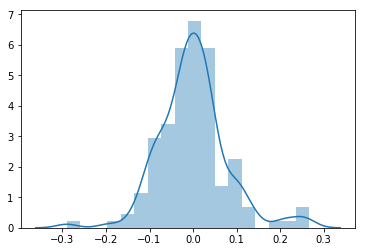

In [85]:
y_train_pred = lr_model.predict(X_train_sm)

res = y_train - y_train_pred
sns.distplot(res)

Observations : 
>> - Residulas are noamally distributed
>> - Mean is centred to Zero

## Predictions and evaluation on the test dataset
>> - create a list of numeric variables of Test Dataset
>> - Perform Scalar Transformation of Numeric Variables
>> - Fit on data

In [86]:

numeric_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


carsprice_df_test[numeric_vars] = scaler.transform(carsprice_df_test[numeric_vars])
carsprice_df_test.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
160        0.4         1           1           1               1   0.313793   
186        0.8         1           1           1               1   0.368966   
59         0.6         1           1           0               1   0.420690   
165        0.6         1           1           0               1   0.272414   
140        0.8         1           1           0               1   0.231034   

     carlength  carwidth  carheight  curbweight       ...         \
160   0.409756  0.341667   0.460177    0.235066       ...          
186   0.497561  0.433333   0.699115    0.305275       ...          
59    0.596748  0.516667   0.522124    0.347944       ...          
165   0.448780  0.308333   0.424779    0.301396       ...          
140   0.263415  0.291667   0.699115    0.291699       ...          

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
160                     0                      0                   0   
186                     0                      0                   0   
59                      0                      0                   0   
165                     0                      0                   0   
140                     0                      0                   0   

     fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
160                1                0               0               0   
186                0                0               0               0   
59                 1                0               0               0   
165                0                0               0               0   
140                1                0               0               0   

     fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
160                0                0                0  
186                1                0                0  
59                 0                0                0  
165                1                0                0  
140                0                0                0  

[5 rows x 65 columns]

In [87]:
carsprice_df_test.describe()

symboling   fueltype  aspiration  doornumber  enginelocation  \
count  62.000000  62.000000   62.000000   62.000000       62.000000   
mean    0.583871   0.887097    0.822581    0.564516        0.967742   
std     0.271724   0.319058    0.385142    0.499868        0.178127   
min     0.000000   0.000000    0.000000    0.000000        0.000000   
25%     0.400000   1.000000    1.000000    0.000000        1.000000   
50%     0.600000   1.000000    1.000000    1.000000        1.000000   
75%     0.800000   1.000000    1.000000    1.000000        1.000000   
max     1.000000   1.000000    1.000000    1.000000        1.000000   

       wheelbase  carlength   carwidth  carheight  curbweight  \
count  62.000000  62.000000  62.000000  62.000000   62.000000   
mean    0.437764   0.559481   0.480376   0.559663    0.428470   
std     0.212861   0.189947   0.165440   0.215811    0.179488   
min     0.000000   0.056911   0.183333   0.141593    0.128394   
25%     0.313793   0.459350   0.358333   0.384956    0.305275   
50%     0.387931   0.547967   0.441667   0.588496    0.406129   
75%     0.570690   0.719919   0.516667   0.699115    0.564876   
max     1.182759   1.089431   0.975000   1.061947    0.935609   

            ...         cylindernumber_three  cylindernumber_twelve  \
count       ...                         62.0                   62.0   
mean        ...                          0.0                    0.0   
std         ...                          0.0                    0.0   
min         ...                          0.0                    0.0   
25%         ...                          0.0                    0.0   
50%         ...                          0.0                    0.0   
75%         ...                          0.0                    0.0   
max         ...                          0.0                    0.0   

       cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
count                62.0        62.000000             62.0       62.000000   
mean                  0.0         0.258065              0.0        0.112903   
std                   0.0         0.441142              0.0        0.319058   
min                   0.0         0.000000              0.0        0.000000   
25%                   0.0         0.000000              0.0        0.000000   
50%                   0.0         0.000000              0.0        0.000000   
75%                   0.0         0.750000              0.0        0.000000   
max                   0.0         1.000000              0.0        1.000000   

       fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
count       62.000000        62.000000        62.000000        62.000000  
mean         0.016129         0.500000         0.048387         0.016129  
std          0.127000         0.504082         0.216335         0.127000  
min          0.000000         0.000000         0.000000         0.000000  
25%          0.000000         0.000000         0.000000         0.000000  
50%          0.000000         0.500000         0.000000         0.000000  
75%          0.000000         1.000000         0.000000         0.000000  
max          1.000000         1.000000         1.000000         1.000000  

[8 rows x 65 columns]

### create y_test by popping price
### create X_test with other variables

In [88]:
y_test = carsprice_df_test.pop('price')
X_test = carsprice_df_test


### Drop the columns from X_test and keep only the columns that are present in X_train_model_18

### Add a constant

In [89]:
X_test_new = X_test[X_train_model_18.columns]
X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()


const  curbweight  CarName_BMW  CarName_PORSCHE  cylindernumber_twelve  \
160    1.0    0.235066            0                0                      0   
186    1.0    0.305275            0                0                      0   
59     1.0    0.347944            0                0                      0   
165    1.0    0.301396            0                0                      0   
140    1.0    0.291699            0                0                      0   

     enginetype_l  
160             0  
186             0  
59              0  
165             0  
140             0

#### Predict the Y

In [91]:
y_test_pred = lr_model.predict(X_test_sm)


#### Plotting y_test and y_pred to understand the spread.

Text(0,0.5,'y_test_pred')

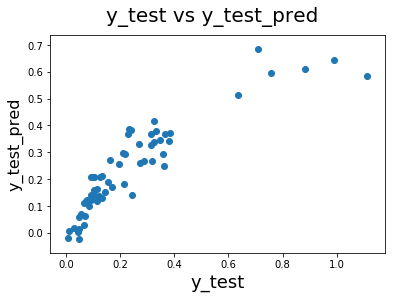

In [92]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

#### Actual vs Predicted Graphical Analysis

Text(0,0.5,'y_test_pred')

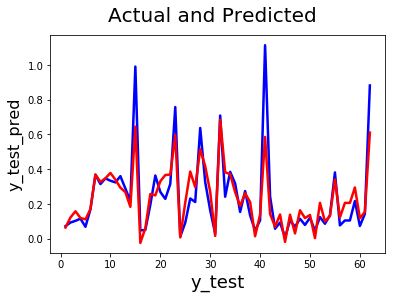

In [93]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)                
plt.xlabel('y_test', fontsize=18)                               
plt.ylabel('y_test_pred', fontsize=16)                          

### R-Squared valu of the Test Dataset

In [94]:
r2_score(y_true=y_test, y_pred=y_test_pred)


0.7792488826701843

In [95]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           7.29e-58
Time:                        01:13:00   Log-Likelihood:                 160.40
No. Observations:                 143   AIC:                            -308.8
Df Residuals:                     137   BIC:                            -291.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1304      0.015     -8.689      0.000      -0.160      -0.101
curbweight                0.8286      0.035     23.777      0.000       0.760       0.898
CarName_BMW               0.2557      0.034      7.445      0.000       0.188       0.324
CarName_PORSCHE           0.3190      0.048      6.710      0.000       0.225       0.413
cylindernumber_twelve     0.1922      0.083      2.307      0.023       0.027       0.357
enginetype_l             -0.1117      0.029     -3.868      0.000      -0.169      -0.055
==============================================================================
Omnibus:                       16.395   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.833
Skew:                           0.434   Prob(JB):                     1.00e-08
Kurtosis:                       5.330   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### I started my modeling with 20 varibales after performed RFE 
### After continuous finetuning of the model based on the probabilities and VIF My model best fitted as below
### My final model has these 5 independent variables and coefficients of independent Variables are as below
- curbweight with coefficient 0.8286
    - With unit increase in curbweight, price increases by 0.8286
- CarName_bmw with coefficient 0.2557 
- CarName_porsche with coefficient 0.3190
    - CarBrands BMW and PORSCHE influence the price of car
- cylindernumber_twelve with coefficient 0.1922
    - Higher cylinder numbers influence the price of car
- enginetype_l with coefficient -0.1117
    - Enginetype_l has negative coefficient indicating that cars with these types of engines will have lesser price
 # Linear Regression Model Assignment Ends Here